<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%A1%D1%91%D1%80%D0%B5%D0%BD%D1%81%D0%B5%D0%BD_%D0%94%D0%B0%D0%B9%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загружаем все необходимые модули:

In [2]:
!pip install multiset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from multiset import Multiset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Создаём функцию, которая считает коэффициент Сёренсена-Дайса для двух корпусов:

In [4]:
def tokenizetext(txt):
    arr = []
    for wrd in txt:
        arr += [wrd]
    return Multiset(arr)


def sorenson_dice(text1, text2):
    ''' Sorenson-Dice similarity of Multisets '''
    bc1, bc2 = tokenizetext(text1), tokenizetext(text2)
    return 2 * len(bc1 & bc2) / (len(bc1) + len(bc2))

Загружаем гарвардские данные:

In [ ]:
df = pd.read_csv('lemmas_levels.csv', sep=',')
df.index = np.arange(1, len(df) + 1)
mark1 = "1E"
mark2 = "2I"
mark3 = "3AU"
mark4 = "4S"
ll1 = df.query('level == @mark1')
ll2 = df.query('level == @mark2')
ll3 = df.query('level == @mark3')
ll4 = df.query('level == @mark4')

Загружаем данные из словаря частотности Шарова:

In [5]:
df = pd.read_csv('dictionary_csv.csv', sep=',')
df.index = np.arange(1, len(df) + 1)
dc1 = df[:1000]
dc2 = df[1000:2000]
dc3 = df[2000:3000]
dc4 = df[3000:]

Проверяем работу функции. Сравниваем два одинаковых корпуса:

In [6]:
data1 = dc1['lemma'].str.lower()
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 1.0


Теперь сравниваем корпус с одинаковым корпусом, который был увеличен в два раза:

In [ ]:
data1 = dc1['lemma'].str.lower().append(dc1['lemma'].str.lower())
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.6666666666666666


<ipython-input-6-6ed9d711d78a>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = dc1['lemma'].str.lower().append(dc1['lemma'].str.lower())


In [ ]:
len(data1)

2000

В три раза:

In [ ]:
data1 = data1.append(dc1['lemma'].str.lower())
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.5


<ipython-input-8-030b0ec7314b>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = data1.append(dc1['lemma'].str.lower())


In [ ]:
len(data1)

3000

В четыре раза:

In [ ]:
data1 = data1.append(dc1['lemma'].str.lower())
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.4


<ipython-input-10-030b0ec7314b>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = data1.append(dc1['lemma'].str.lower())


Сравниваем уровень А1 для гарвардских данных и Шарова:

In [ ]:
data1 = ll1['lemma'].str.strip('\'')
data2 = dc1['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.43487321986800975


Сравниваем уровень А2 для гарвардских данных и Шарова:

In [ ]:
data1 = ll2['lemma'].str.strip('\'')
data2 = dc2['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.161055750067331


Сравниваем уровень В1 для гарвардских данных и Шарова:

In [ ]:
data1 = ll3['lemma'].str.strip('\'')
data2 = dc3['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.011102947179361581


Сравниваем уровень В2 для гарвардских данных и Шарова:

In [ ]:
data1 = ll4['lemma'].str.strip('\'')
data2 = dc4['lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.018772266374349138


Загружаем данные Twirll A1:

In [ ]:
df = pd.read_csv('A1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A1 = df[:754]

Сравниваем уровень А1 для гарвардских данных и Twirll:

In [ ]:
data1 = ll1['lemma'].str.strip('\'')
data2 = A1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.4238511203949867


Загружаем данные Twirll А2:

In [ ]:
df = pd.read_csv('A2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A2 = df[:1048]

Сравниваем уровень А2 для гарвардских данных и Twirll:

In [ ]:
data1 = ll2['lemma'].str.strip('\'')
data2 = A2['Unnamed: 0'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.12390321722946025


Загружаем данные Twirll В1:

In [ ]:
df = pd.read_csv('B1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B1 = df[:1081]

Сравниваем уровень В2 для гарвардских данных и Twirll:

In [ ]:
data1 = ll3['lemma'].str.strip('\'')
data2 = B1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.008110300081103


Загружаем данные Twirll В2:

In [ ]:
df = pd.read_csv('B2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B2 = df[:3331]

Сравниваем уровень B2 для гарвардских данных и Twirll:

In [ ]:
data1 = ll4['lemma'].str.strip('\'')
data2 = B2['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.03403026307528097


Сравниваем уровень A1 для Шарова и Twirll:

In [ ]:
data1 = dc1['lemma'].str.lower()
data2 = A1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.35347776510832385


Сравниваем уровень A2 для Шарова и Twirll:

In [ ]:
data1 = dc2['lemma'].str.lower()
data2 = A2['Unnamed: 0'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.14453125


Сравниваем уровень В1 для Шарова и Twirll:

In [ ]:
data1 = dc3['lemma'].str.lower()
data2 = B1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.12686208553580008


Сравниваем уровень В2 для Шарова и Twirll:

In [ ]:
data1 = dc4['lemma'].str.lower()
data2 = B2['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.2134683924216845


Загружаем данные РКИ А1:

In [ ]:
df = pd.read_csv('new_vocab_a1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv1 = df

In [ ]:
len(df)

994

Сравниваем уровень А1 для гарвардских данных и РКИ:

In [ ]:
data1 = ll1['lemma'].str.strip('\'')
data2 = nv1['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.4949530107901149


Загружаем данные РКИ А2:

In [ ]:
df = pd.read_csv('new_vocab_a2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv2 = df

Сравниваем уровень А2 для гарвардских данных и РКИ:

In [ ]:
data1 = ll2['lemma'].str.strip('\'')
data2 = nv2['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.10842525228819526


Загружаем данные РКИ В1:

In [ ]:
df = pd.read_csv('new_vocab_b1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv3 = df

Сравниваем уровень В1 для гарвардских данных и РКИ:

In [ ]:
data1 = ll3['lemma'].str.strip('\'')
data2 = nv3['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.011079524746701654


Загружаем данные РКИ В2:

In [ ]:
df = pd.read_csv('new_vocab_b2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv4 = df

Сравниваем уровень В2 для гарвардских данных и РКИ:

In [ ]:
data1 = ll4['lemma'].str.strip('\'')
data2 = nv4['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.0333996903339969


Сравниваем уровень А1 для Шарова и РКИ:

In [ ]:
data1 = dc1['lemma'].str.lower()
data2 = nv1['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.41624874623871616


Сравниваем уровень А1 для Twirll и РКИ:

In [ ]:
data1 = nv1['а'].str.lower()
data2 = A1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.816933638443936


Сравниваем уровень А2 для Шарова и РКИ:

In [ ]:
data1 = dc2['lemma'].str.lower()
data2 = nv2['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.21821036106750394


Сравниваем уровень А2 для Twirll и РКИ:

In [ ]:
data1 = nv2['а'].str.lower()
data2 = A2['Unnamed: 0'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.5570107858243452


Сравниваем уровень В1 для Шарова и РКИ:

In [ ]:
data1 = dc3['lemma'].str.lower()
data2 = nv3['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.16253602305475504


Сравниваем уровень B1 для Twirll и РКИ:

In [ ]:
data1 = nv3['а'].str.lower()
data2 = B1['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.5226696705153477


Сравниваем уровень В2 для Шарова и РКИ:

In [ ]:
data1 = dc4['lemma'].str.lower()
data2 = nv4['а'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.26335470085470086


Сравниваем уровень B2 для Twirll и РКИ:

In [ ]:
data1 = nv4['а'].str.lower()
data2 = B2['Lemma'].str.lower()
sd = sorenson_dice(data1, data2)
print("Сёренсен-Дайс:", sd)

Сёренсен-Дайс: 0.7189023698832067


Создаём тепловую матрицу для уровня А1:

In [ ]:
columns=['Harvard (0)', 'Sharoff (1)', 'Twirll (2)', 'РКИ (3)']

data = [
[1, 0.44, 0.42, 0.5],
[0.44, 1, 0.15, 0.22],
[0.42, 0.15, 1, 0.82],
[0.5, 0.22, 0.82, 1]
]

df = pd.DataFrame(data, columns=columns)

<Axes: >

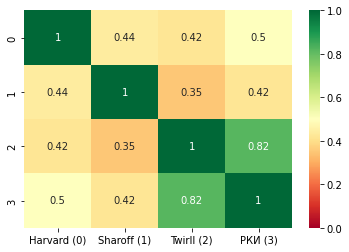

In [ ]:
sns.heatmap(df, annot=True, vmin=0, vmax=1, cmap ='RdYlGn')

Создаём тепловую матрицу для уровня А2:

In [ ]:
columns=['Harvard (0)', 'Sharoff (1)', 'Twirll (2)', 'РКИ (3)']

data = [
[1, 0.16, 0.12, 0.11],
[0.16, 1, 0.35, 0.42],
[0.12, 0.35, 1, 0.56],
[0.11, 0.42, 0.56, 1]
]

df = pd.DataFrame(data, columns=columns)

<Axes: >

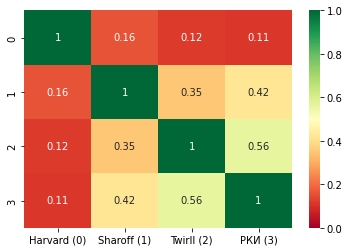

In [ ]:
sns.heatmap(df, annot=True, vmin=0, vmax=1, cmap ='RdYlGn')

Создаём тепловую матрицу для уровня В1:

In [ ]:
columns=['Harvard (0)', 'Sharoff (1)', 'Twirll (2)', 'РКИ (3)']

data = [
[1, 0.01, 0.01, 0.01],
[0.01, 1, 0.13, 0.16],
[0.01, 0.13, 1, 0.52],
[0.01, 0.16, 0.52, 1]
]

df = pd.DataFrame(data, columns=columns)

<Axes: >

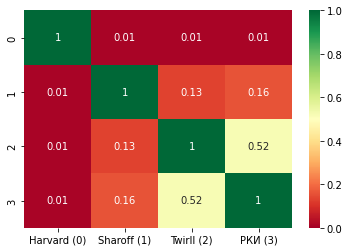

In [ ]:
sns.heatmap(df, annot=True, vmin=0, vmax=1, cmap ='RdYlGn')

Создаём тепловую матрицу для уровня В2:

In [ ]:
columns=['Harvard (0)', 'Sharoff (1)', 'Twirll (2)', 'РКИ (3)']

data = [
[1, 0.02, 0.03, 0.03],
[0.02, 1, 0.21, 0.26],
[0.03, 0.21, 1, 0.72],
[0.03, 0.26, 0.72, 1]
]

df = pd.DataFrame(data, columns=columns)

<Axes: >

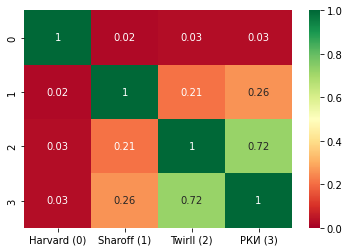

In [ ]:
sns.heatmap(df, annot=True, vmin=0, vmax=1, cmap ='RdYlGn')